<div align="center">
<h1>
Python for Social Science Workshop - Lesson 5
</h1>
</div>
<br />
<div align="center">
<h3>
Jose J Alcocer
</h3>
</div>
<br />
<div align="center">
<h4>
May 2, 2023
</h4>
</div>

****

The purpose of today's lesson will be to introduce basic concepts of text analysis using Python. This lesson assumes that you all have some basic knowledge of text analysis in R, as some of the processes that we do here will be compared to how they are done in R. The goal of the lesson will be to learn how to conduct text analysis to use tweets collected to: <br>

* Graph hashtag trends from tweets; <br>
* Create wordclouds from most frequent and unique tweets;
* Run topic models from tweets; and
* Conduct a sentiment analysis on tweets

# 1.0 Basic Text Analysis <br>

Let's start off by learning some basic text analysis functions that do not require many library packages. We will be using a dataset of Donald Trump's tweets downloaded from the [Trump Twitter Archive](https://www.thetrumparchive.com/).

In [9]:
import numpy as np
import pandas as pd
import datetime
import re

tweets = pd.read_csv('tweets_01-08-2021.csv') # importing tweets file
tweets['date'] = pd.to_datetime(tweets['date']) # changing our date format to datetime
tweets = tweets.sort_values(by='date').reset_index() # sorting tweets chronologically and resetting index
tweets.head()

,index,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,13325,1698308935,Be sure to tune in and watch Donald Trump on L...,f,f,Twitter Web Client,939,519,2009-05-04 18:54:25,f
1,13324,1701461182,Donald Trump will be appearing on The View tom...,f,f,Twitter Web Client,259,34,2009-05-05 01:00:10,f
2,13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,f,f,Twitter Web Client,37,15,2009-05-08 13:38:08,f
3,13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,f,f,Twitter Web Client,29,11,2009-05-08 20:40:15,f
4,13321,1773561338,"""""""My persona will never be that of a wallflow...",f,f,Twitter Web Client,1877,1321,2009-05-12 14:07:28,f


We can search for specific terms using the `str.contains` function with our imported dataframe.

In [2]:
# How many of the tweets contain the word Trump?
self_tweets = tweets[tweets['text'].str.contains('Trump')] # case = False lets us search for lowercase too| set to True to be case-sensitive

print(self_tweets['text'][0:5]) # printing first 5 tweets

# with the command above, we can add the `len()` to get the total amount of them
len(self_tweets) # this function gives us the total number of tweets that are RTs

print("A total of " +str(len(self_tweets))+ " tweets contain the word 'Trump'.") # getting a sentence that gives us that value

0    Be sure to tune in and watch Donald Trump on L...
1    Donald Trump will be appearing on The View tom...
2    Donald Trump reads Top Ten Financial Tips on L...
4    """My persona will never be that of a wallflow...
5    "Miss USA Tara Conner will not be fired - ""I'...
Name: text, dtype: object
A total of 17824 tweets contain the word 'Trump'.


`str.contains` is case sensitive. If you want it to not be, you can insert the `case=False` argument right after the term you want to search for.

In [3]:
self_tweets = tweets[tweets['text'].str.contains('Trump', case=False)] # searching for tweets containing upper and lower case 'Trump'

print("A total of " +str(len(self_tweets))+ " tweets contain the word 'Trump' in both uppercase and lowercase.") # getting a sentence that gives us that value

A total of 18356 tweets contain the word 'Trump' in both uppercase and lowercase.


We can use regular expressions to search through more complex string sequences that we are interested in. This [link](https://docs.python.org/3/howto/regex.html) provides more information on regular expressions. The following are some common expressions used: <br> <br>

* `.` matches any character, `^` and `$` match the beginning and end of a string.
* Any character followed by `{3}`, `*`, `+` is matched exactly 3 times, 0 or more times, 1 or more times.
* `[0-9]`, `[a-zA-Z]`, `[:alnum:]` match any digit, any letter, or any digit and letter.
* Special characters such as `.`, `\`, `(` or `)` must be preceded by a backslash. <br> <br>

The following code chunks showcase how we can search for more specific types of strings within our dataframe. <br> <br>

**Example One** - Finding tweets that contain the word "immigrant" or "immigration". We can use the `|` operator to signal to Python that we are interested in both of these terms.

In [4]:
immigration_tweets = tweets[tweets['text'].str.contains('immigrant|immigration', case=False)] # looking for tweets containing these words

print(immigration_tweets['text'][0:5]) # printing these words

print("A total of " +str(len(immigration_tweets))+ " tweets have the word 'immigrant' or 'immigration'.") # getting a sentence that gives us that value

809     "Illegal immigration is a wrecking ball aimed ...
813     Canada's legal immigration plan starts with a ...
1346    ObamaCare gives free insurance to illegal immi...
1430    """The illegal immigrant crime problem is far ...
1654    Don't be fooled. In 2008 @BarackObama promised...
Name: text, dtype: object
A total of 433 tweets have the word 'immigrant' or 'immigration'.


**Example Two** - Finding tweets that are retweets. The `^` tells Python to look for the term(s) at the beginning of each string.

In [5]:
Retweets = tweets[tweets['text'].str.contains('^RT @')] # looking for tweets that are retweets

print(Retweets['text'][0:5]) # printing these words

print("A total of " +str(len(Retweets))+ " tweets are Retweets.")

806     RT @Newsmax_Media: Trumps Warns of Obama Tippi...
1275    RT @accesshollywood: @realDonald Trump: 'Celeb...
1314    RT @OCChoppers: Bike we built for @realDonaldT...
2423    RT @IBDeditorials: Was Barack Obama A Foreign ...
2799    RT @MittRomney: For nearly 4 years, Barack Oba...
Name: text, dtype: object
A total of 9701 tweets are Retweets.


**Example Three** - Finding tweets that are replies.

In [6]:
Mentions = tweets[tweets['text'].str.contains('^@[0-9_A-Za-z]+')] # looking for tweets that are mentions or replies

print(Mentions['text'][0:5]) # printing these words

print("A total of " +str(len(Mentions))+ " tweets are Replies.")

240    @shouldtrumprun Hundreds of thousands of suppo...
260    @danmcisaac Hopefully this answers your questi...
264    @oreillyfactor is having a poll, cast your vot...
275    @TheRealMissUSA and the 2011 contestants stopp...
290    @GolfMagazine is having an online competition ...
Name: text, dtype: object
A total of 2579 tweets are Replies.


**Example Four** - Finding tweets that start with hashtags.

In [7]:
Hashtags = tweets[tweets['text'].str.contains('^#[0-9_A-Za-z]+')] # looking for tweets that are mentions or replies

print(Hashtags['text'][0:5]) # printing these words

print("A total of " +str(len(Hashtags))+ " tweets have Hashtags at the beginning.")

323    #trumpvlog The Republicans must act now, don't...
779    #trumpvlog @BarackObama is very inconsiderate....
802    #TimeToGetTough: Making America #1 Again--my n...
837    #TimeToGetTough presents bold solutions on tax...
841    #TimeToGetTough The crowd at the book signing ...
Name: text, dtype: object
A total of 391 tweets have Hashtags at the beginning.


**Example Five** - Extracting all hashtags and adding them to a new variable.

In [10]:
tweets['hashtag'] = tweets['text'].apply(lambda x: re.findall(r"#(\w+)", x))

tweets.head()

,index,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,hashtag
0,13325,1698308935,Be sure to tune in and watch Donald Trump on L...,f,f,Twitter Web Client,939,519,2009-05-04 18:54:25,f,[]
1,13324,1701461182,Donald Trump will be appearing on The View tom...,f,f,Twitter Web Client,259,34,2009-05-05 01:00:10,f,[]
2,13323,1737479987,Donald Trump reads Top Ten Financial Tips on L...,f,f,Twitter Web Client,37,15,2009-05-08 13:38:08,f,[]
3,13322,1741160716,New Blog Post: Celebrity Apprentice Finale and...,f,f,Twitter Web Client,29,11,2009-05-08 20:40:15,f,[]
4,13321,1773561338,"""""""My persona will never be that of a wallflow...",f,f,Twitter Web Client,1877,1321,2009-05-12 14:07:28,f,[]


**Example Six** - Extracting all hashtags, tabling, and plotting their frequency. For this task, we can use the `.str.extractall` function.

#Trump2016                761
#MakeAmericaGreatAgain    557
#MAGA                     524
#CelebApprentice          289
#1                        144
#CelebrityApprentice      137
#AmericaFirst             107
#TimeToGetTough            95
#Trump                     81
#DrainTheSwamp             78
Name: 0, dtype: int64


Text(0.5, 1.0, "Trump's Top Ten Hashtags")

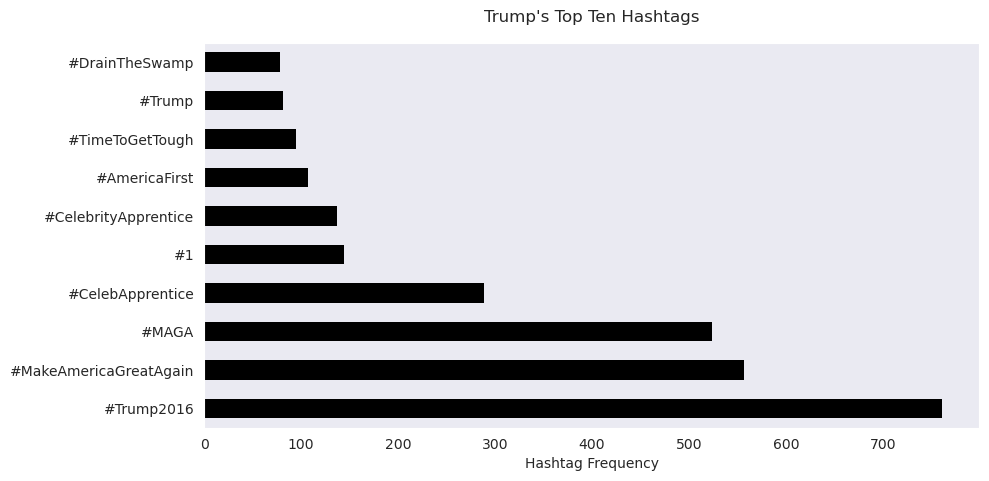

In [11]:
tags = tweets.text.str.extractall(r'(#[0-9_A-Za-z]+)') # Extracting all hashtags
tags = pd.Series(tags[0]).value_counts() # Getting frequency count of all hashtags
print(tags[0:10]) # Printing top 10 most frequent hashtags for Trump

# Importing plot library packages
from matplotlib import style
from matplotlib import pyplot as plt

# Plotting frequency distributions
ax = plt.subplot(1, 1, 1)
style.use("default") # Using specific plot style
tags[0:10].plot(ax=ax, kind='barh', figsize=(10,5), color='black') # Plotting top 10 hashtags
plt.xlabel("Hashtag Frequency") # Setting x-label
plt.title("Trump's Top Ten Hashtags", pad=15) # Setting title
#plt.savefig('figure1.png', bbox_inches='tight', facecolor='White') # This can save your figure in your directory

# 2.0 Preprocessing Text

For our next section, we will be using a sample dataset from Elon Musk's Twitter account. The data was collected from [Kaggle](https://www.kaggle.com/datasets/gpreda/elon-musk-tweets) and the range of tweets is from the start of July 2022 to April 2023.

In [12]:
import pandas as pd
import numpy as np

tweets = pd.read_csv('elon_musk_tweets.csv') # importing tweets file
tweets['date'] = pd.to_datetime(tweets['date']) # changing our date format to datetime
tweets = tweets.sort_values(by='date').reset_index() # sorting tweets chronologically and resetting index
tweets.head()

,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,8,1544316752657629189,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 13:46:20+00:00,@historydefined While bleak posts maybe genera...,NaN,Twitter for iPhone,2347,47623,False
1,7,1544320280247549954,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 14:00:21+00:00,@TonyadeVitti @historydefined His success was ...,NaN,Twitter for iPhone,171,3196,False
2,6,1544330849927270408,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 14:42:21+00:00,@slashdot It’s time,NaN,Twitter for iPhone,1537,31194,False
3,5,1544374564255309826,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:36:03+00:00,I must confess to a penchant for creative socks,NaN,Twitter for iPhone,4839,97004,False
4,4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


# 2.1 Tokenization, Punctuation-URL-Stopword Removal, and Stemming <br>

While Python does not have an all-in-one package like Quanteda, Python does offer several library packages that can preprocess data for text analysis. For example, Python's Natural Language Processing Toolkit (NLTK) library is one of the most widely used libraries for natural language processing in Python. With NLTK, we can tokenize strings with one of two functions. `TweetTokenizer` or `word_tokenize`. Because we are working with tweets in this example, using `TweetTokenizer` will be more useful, as this function is better equipped to handle the tokenization of tweets and what they may include (e.g., handles). <br>

Common pre-processing techniques allow us to remove punctuation and URL links. These can be down with indexing strings using regular expressions. Additional Pre-processing tools we can apply to text (i.e., tweets) include removing stopwords. Stopwords are considered noise in text, consisting of words such as is, am, are, this, a, an, the, etc. Because of the noise they produce, removing them helps identify more important characteristics found in text. The `stopwords` function allows us to get a list of all stopwords that NLTK has in its library package. NLTK's stopwords list is available in multiple languages, and they can be called simply by applying the following code: <br> <br>

`stopword.words('insert language here')` <br> <br>

We can also apply stemming and lemmatization. More information about these two can be found [here](https://www.datacamp.com/tutorial/stemming-lemmatization-python).

One of the drawbacks of NLTK is that you cannot simply feed a dataframe and get results as easily as with Quanteda. Luckily, we can use create a function that can do all of these things for us at once. Not only can we get a function to give us a token list, but we can create a token class object, like quanteda does, in order to have all of the information we need in a dataframe-like object. <br> <br>

Let's start off by installing and loading all the packages needed.

In [ ]:
#pip install nltk

In [13]:
import nltk

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import string

# Downloads all the data packages; this only needs to be run once. Unhash to run
#nltk.download('all')
#nltk.download('punkt')

Now that we have all we need, we can create the function that will do everything we want it to do. For this function to work, we must ensure that our column ('variable') is named "text" as the function will be calling this column as that.

In [14]:
def process_text(text):

    # Removing all punctuations and urls when tokenizing tweets
    tokenizer = RegexpTokenizer(r'\w+') # this reg expression code returns only alphanumeric characters, removing all the rest
    stem_tokens = tokenizer.tokenize(text)

    # Removing stopwords
    stem_tokens = [token for token in stem_tokens if token not in stopwords.words('english')]

    # Stemming tweets via lemmatization
    lem = WordNetLemmatizer()
    stem_tokens = [lem.lemmatize(token) for token in stem_tokens]

    # Joining everything back to the text object
    processed_text = ' '.join(stem_tokens)

    return processed_text

In [15]:
# Convert all strings to lowercase
tweets['text'] = tweets['text'].str.lower()

# Applying the function to each row
tweets['tokens'] = tweets['text'].apply(process_text)

In [16]:
# Viewing the tokenized
tweets['tokens']

0       historydefined bleak post maybe generate click...
1       tonyadevitti historydefined success fact due p...
2                                           slashdot time
3                     must confess penchant creative sock
4       sock tech advanced get pretty much anything so...
                              ...                        
4849    lhsummers federalreserve davidwestin bloomberg...
4850    teslaownerssv jonmcneill like ai human neural ...
4851                               endwokeness concerning
4852                             anc_aesthetics important
4853    lhsummers federalreserve davidwestin bloomberg...
Name: tokens, Length: 4854, dtype: object

# 2.2 Creating a Document Term Matrix <br>

With our tokens being created, we can move onto to constructing our document term matrix. If you need a refresher on what a DTM is, this [article](https://medium.com/analytics-vidhya/tdm-term-document-matrix-and-dtm-document-term-matrix-8b07c58957e20) sums it up quite nicely. We will be using Sklearn's `CountVectorizer` function to create our dtm from our tokens.

In [ ]:
#pip install scikit-learn

In [17]:
# Import function
from sklearn.feature_extraction.text import CountVectorizer

# Setting up the function
countvec = CountVectorizer()

# Applying the function to our tokens
dtm = countvec.fit_transform(tweets['tokens'])

In [18]:
# Taking a look at the results
dtm

<4854x8287 sparse matrix of type '<class 'numpy.int64'>'
	with 33007 stored elements in Compressed Sparse Row format>

Now that we have our DTM, we can convert the object to a dataframe in order to get a better picture of our documents that are collected.

In [19]:
dtm = pd.DataFrame(dtm.toarray(), columns=countvec.get_feature_names_out(), index=tweets.index)
dtm.head()

,000,008zpnmegm,01fmxyrrvr,02100_eth,04efhdxate,0ecpd30qas,0faazmezra,0gzbmf83tt,0is89mjlky,0j1lmreobs,...,zqfyymk3lp,zqqnolhcdn,zssbecker,zswitten,zubymusic,zutcsd7fiz,zuuy1szjud,zydrar6mxf,zyrvfjywo4,秦始皇
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With our newly formed dataframe, we can run pandas statistical functions, like finding out our most common features.

In [20]:
dtm.sum().sort_values(ascending=False)

co              1113
http            1110
twitter          425
amp              286
billym2k         203
                ... 
hilary             1
hilarious          1
hikingskiing       1
hike               1
秦始皇                1
Length: 8287, dtype: int64

Upon inspection, we can see that our DTM has words that were not removed completely. We can create our own custom list of stopwords and use pandas to remove those from our dataframe in order to get a clearer picture of what terms were tweeted by Elon.

In [21]:
remove_words = ["http","co","amp","good","time","people","true","great","like","exactly","much","one","day","many","account","would",
                "year","yeah","make","work","real","need","right","still","next","get"]

dtm = dtm.drop(remove_words, axis=1)

dtm.sum().sort_values(ascending=False)

twitter           425
billym2k          203
tesla             172
wholemarsblog     169
spacex            108
                 ... 
hike                1
highway             1
hierarchy           1
hierarchically      1
秦始皇                 1
Length: 8261, dtype: int64

# 3.0 Wordclouds <br>

Now that we a clean DTM, one of the things we can do with it is construct a wordcloud. For this, we will be using the `wordcloud` library package.

In [ ]:
#pip install wordcloud

In [ ]:
#  Most basic colormaps to use:

#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

# 'viridis" is the default if nothing is chosen

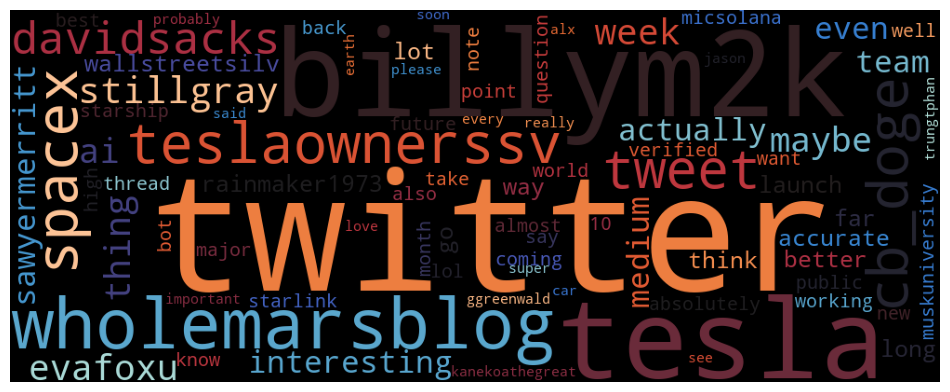

In [22]:
from wordcloud import WordCloud
from matplotlib import style
from matplotlib import pyplot as plt

#WordCloud
wc = WordCloud(width=1000, height=400, max_words=80, min_font_size=6,
               background_color='black',
               colormap='icefire').generate_from_frequencies(dtm.sum().sort_values(ascending=False))
plt.figure(figsize=(12,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 3.1 TF-IDF scores <br>

How to find distinctive words in a corpus is a long-standing question in text analysis. Today, we'll learn one simple approach to this: TF-IDF. The idea behind words scores is to weight words not just by their frequency, but by their frequency in one document compared to their distribution across all documents. Words that are frequent, but are also used in every single document, will not be distinguishing. We want to identify words that are unevenly distributed across the corpus. One of the most popular ways to weight words (beyond frequency counts) is tf-idf score. By offsetting the frequency of a word by its document frequency (the number of documents in which it appears) will in theory filter out common terms such as 'the', 'of', and 'and'. <br>

The following code snippets calculate these scores and construct another word cloud using these unique terms.

In [23]:
# Importing package
from sklearn.feature_extraction.text import TfidfVectorizer

# Fitting the model and obtaining the dtm
tfidfvec = TfidfVectorizer()
tfidf_dtm = tfidfvec.fit_transform(tweets['tokens'])
tfidf_dtm

<4854x8287 sparse matrix of type '<class 'numpy.float64'>'
	with 33007 stored elements in Compressed Sparse Row format>

In [24]:
# Converting dtm to dataframe
tfids = pd.DataFrame(tfidf_dtm.toarray(), columns=tfidfvec.get_feature_names_out(), index=tweets.index)
tfids.head()

,000,008zpnmegm,01fmxyrrvr,02100_eth,04efhdxate,0ecpd30qas,0faazmezra,0gzbmf83tt,0is89mjlky,0j1lmreobs,...,zqfyymk3lp,zqqnolhcdn,zssbecker,zswitten,zubymusic,zutcsd7fiz,zuuy1szjud,zydrar6mxf,zyrvfjywo4,秦始皇
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Obtaining most frequent words
tfids.max().sort_values(ascending=False).head(10)

rising_serpent    1.0
marceloplima      1.0
chad_hurley       1.0
mcuban            1.0
blader            1.0
doge              1.0
twitter           1.0
astronomy         1.0
theonion          1.0
davidsacks        1.0
dtype: float64

In theory, these IDF scores are best used when you want to identify distinctive words for individual documents, or groups of documents, compared to other groups or the corpus as a whole. While we only have Elon Musk's tweets in this DTM, if we had other users in here, we could compare unique terms that each person would be tweeting. One would do this simply by creating a new variable in the DTM with the name or category of the comparison groups, which would allow us to subset the DTM and compare scores across groups.



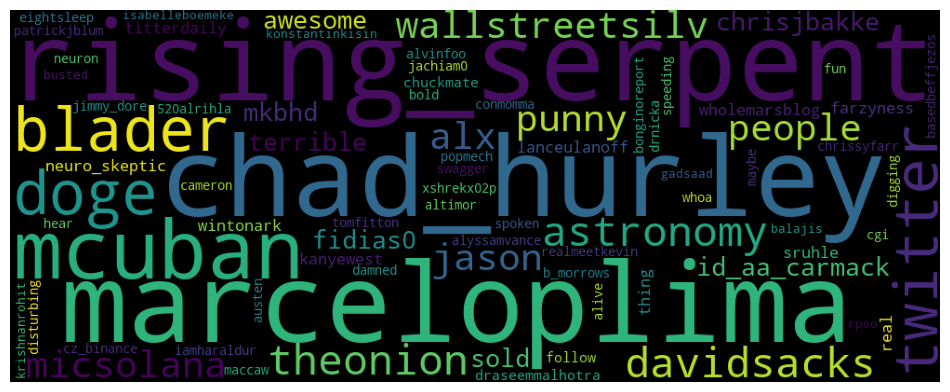

In [26]:
wc = WordCloud(width=1000, height=400, max_words=80, min_font_size=6,
               background_color='black',
               colormap='viridis').generate_from_frequencies(tfids.max().sort_values(ascending=False))
plt.figure(figsize=(12,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 4.0 Unsupervised Machine Learning: Topic Models using Latent Dirichlet Allocation (LDA) <br>

This section assumes that you have some basic understanding of LDA topic models. However, this [article](https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd) provides a good summary about what it does. <br>

We will be using a basic package from Sklearn's LatentDirichlet Allocation library.

In [36]:
# Importing the packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as lda

In [37]:
# Getting our DTM again
countvec = CountVectorizer()
dtm = countvec.fit_transform(tweets['tokens'])
dtm = pd.DataFrame(dtm.toarray(), columns=countvec.get_feature_names_out(), index=tweets.index)

remove_words = ["http","co","amp","good","time","people","true","great","like","exactly","much","one","day","many","account","would",
                "year","yeah","make","work","real","need","right","still","next","get"]

dtm = dtm.drop(remove_words, axis=1)

In [38]:
# Creating the model and fitting our dtm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
lda = lda(n_components=5, # number of topics; remember 10 actually means 9 as Python starts from 0
          max_iter=20, # number of iterations
          random_state=0) # random seed
lda = lda.fit(dtm)

In [39]:
# Creating a function that will nicely print out the topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [41]:
# Printing out the topics
tf_feature_names = countvec.get_feature_names_out()
print_top_words(lda, tf_feature_names, 20)


Topic #0:
telescope latency turned billy target stalin wfb0t1n87d termin mundfish watt thevivafrei 10 lopatonok sotcpf2dzk jwsq62qkru 69 gm sugar regarded terminology

Topic #1:
billy wfb0t1n87d absolutely sandyleevincent cavill termin telescope theprimeagen tufj90gaj6 lest zf44kzapxf mattmackowiak beta fantasy turned beshf4nxgf partisan triggered watt even

Topic #2:
turned europe billy lockheed warfare cometh cavill thequartering superset termin evenly newsfromscience tufj90gaj6 leading lopatonok gm solid fedorov mattmackowiak measure

Topic #3:
davidmarcus turned sotcpf2dzk steal ahuitfeldt measure fanaticism civil accuracy teslasolar r4bkf0azwa trimming jana84818846 michaelcrowley upgrade positive sarcasm headcount tufj90gaj6 lehxv95njj

Topic #4:
turned intend klenderjoey wfb0t1n87d w9ahiuutp5 location vzii8cy54n fanaticism billy actual logistically accuracy allysiafinley wmwbxefit1 hscbkgprcp concept corpo theealeexj tufj90gaj6 ibiyxlqolm



# 4.1 Getting Topic Weights <br>

One thing we may want to do with the output is compare the prevalence of each topic across documents. A simple way to do this (but not memory efficient), is to merge the topic distribution back into the Pandas dataframe.

In [42]:
# Getting the topic distribution array
topic_dist = lda.transform(dtm)

In [43]:
# Showing these distributions
topic_dist

array([[0.01830387, 0.01837834, 0.92619267, 0.01864144, 0.01848368],
       [0.94135403, 0.01477986, 0.01468892, 0.01468164, 0.01449554],
       [0.10147979, 0.10000263, 0.59549466, 0.10228958, 0.10073334],
       ...,
       [0.06666822, 0.06666867, 0.07111055, 0.06733283, 0.72821973],
       [0.07031712, 0.06666863, 0.06790025, 0.06927387, 0.72584012],
       [0.02047073, 0.02018521, 0.02027678, 0.02053444, 0.91853284]])

In [44]:
#
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(tweets[['text','tokens']])
df_w_topics

,0,1,2,3,4,text,tokens
0,0.018304,0.018378,0.926193,0.018641,0.018484,@historydefined while bleak posts maybe genera...,historydefined bleak post maybe generate click...
1,0.941354,0.014780,0.014689,0.014682,0.014496,@tonyadevitti @historydefined his success was ...,tonyadevitti historydefined success fact due p...
2,0.101480,0.100003,0.595495,0.102290,0.100733,@slashdot it’s time,slashdot time
3,0.033489,0.033592,0.033594,0.033557,0.865768,i must confess to a penchant for creative socks,must confess penchant creative sock
4,0.025120,0.025241,0.025442,0.025050,0.899147,sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...
...,...,...,...,...,...,...,...
4849,0.016831,0.017180,0.017632,0.931513,0.016845,@lhsummers @federalreserve @davidwestin @bloom...,lhsummers federalreserve davidwestin bloomberg...
4850,0.015828,0.015631,0.567914,0.015954,0.384673,"@teslaownerssv @jonmcneill just like ai, human...",teslaownerssv jonmcneill like ai human neural ...
4851,0.066668,0.066669,0.071111,0.067333,0.728220,@endwokeness very concerning,endwokeness concerning
4852,0.070317,0.066669,0.067900,0.069274,0.725840,@anc_aesthetics very important,anc_aesthetics important


# 5.0 Sentiment Analysis

The NLTK library contains a pretrained sentiment analyzer called VADER (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).

Because VADER is pretrained, it's much easier to get results than training your own model. VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. While it's good for short bursts of text, it can become less accurate when rating longer, structured sentences.

## Getting the scores <br>

First, we’ll initialize a Sentiment Intensity Analyzer object from the nltk.sentiment.vader library.

Next, we’ll define a function called get_sentiment that takes a text string as its input. The function calls the polarity_scores method of the analyzer object to obtain a dictionary of sentiment scores for the text, which includes a score for positive, negative, and neutral sentiment.

The function will then check whether the positive score is greater than 0 and returns a sentiment score of 1 if it is, and a 0 otherwise. This means that any text with a positive score will be classified as having a positive sentiment, and any text with a non-positive score will be classified as having a negative sentiment.

Finally, we’ll apply the get_sentiment function to the tweets DataFrame using the apply method. This creates a new column called sentiment in the DataFrame, which stores the sentiment score for each tweet.

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
# Starting the analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function that calculates the score and assigns positive or negative dummy
def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

# apply get_sentiment function to our dataframe variable, tokens
tweets['sentiment'] = tweets['tokens'].apply(get_sentiment)

# Tabling our scores to see how many tweets are positively labeled and negatively labeled
tweets['sentiment'].value_counts()

0    2484
1    2370
Name: sentiment, dtype: int64